In [1]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

# dataframe의 처음 다섯 줄을 보여줍니다.
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1-8. 그래프 4대 천왕 (2) 범주형 데이터


변수 데이터를 시각화할 때 데이터 종류에 따라 사용하는 그래프가 다름.

* 범주형 : 가로, 세로, 누적 그룹화 된 막대그래프를 사용. ( tip 데이터 중 sex, smoker, day, time, size )
* 수치형 : 산점도 , 선그래프 등 ( tip , total_bill )



# 범주형 데이터
1) 막대그래프 ( bar graph )

1-1) Pandas와 Matplotlib를 활용한 방법

성별에 따른 팁 액수의 평균

In [2]:
grouped = df['tip'].groupby(df['sex'])

In [3]:
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꿔줍니다.
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [4]:
x = list(sex.keys())  ## 딕셔너리의 key 값 list  형태로
x

['Male', 'Female']

In [5]:
y = list(sex.values())  ## 딕셔너리의 key 값 list  형태로
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

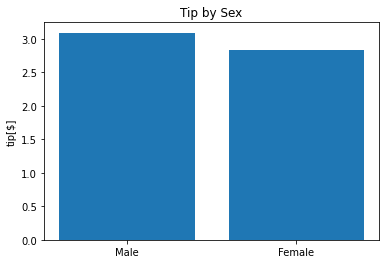

In [6]:
import matplotlib.pyplot as plt

plt.bar(x = x , height = y) # parameter  x , height
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

In [7]:
# 요일에 따른 평균 tip의 그래프

day_tip_mean =  dict(df['tip'].groupby(df['day']).mean())
day_tip_mean

{'Thur': 2.7714516129032254,
 'Fri': 2.734736842105263,
 'Sat': 2.993103448275862,
 'Sun': 3.2551315789473683}

In [8]:
x = list(day_tip_mean.keys())

In [9]:
y = list(day_tip_mean.values())

Text(0.5, 1.0, 'Tip by Day')

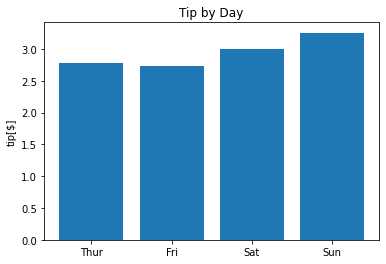

In [10]:
plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Day')
#plt.show()

1-2) Seaborn과 Matplotlib을 활용한 간단한 방법

sns.barplot의 인자로 df를 넣고 원하는 컬럼을 지정해 주면 아래와 같이 성별에 대한 tip 평균을 볼 수 있음.

<AxesSubplot:xlabel='sex', ylabel='tip'>

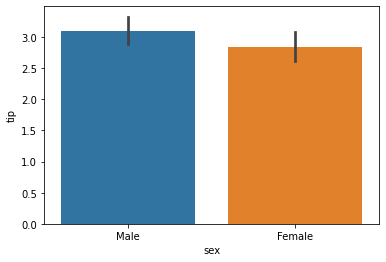

In [11]:
sns.barplot( data = df , x ='sex' , y = 'tip') # dataframe, x = 컬럼, y = 컬럼

<AxesSubplot:xlabel='day', ylabel='tip'>

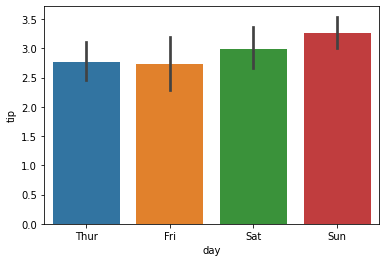

In [12]:
sns.barplot( data = df , x ='day' , y = 'tip')

figure 사이즈, title 등 지정

Text(0.5, 1.0, 'Tip by sex')

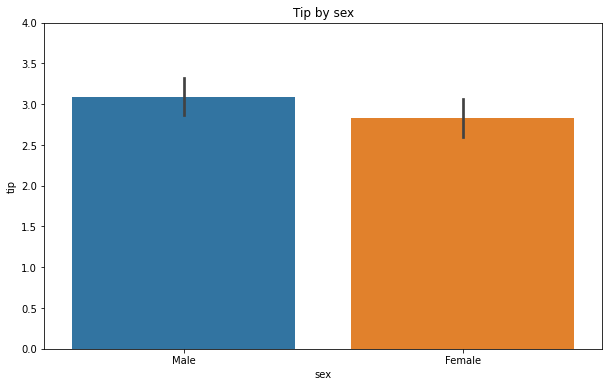

In [13]:
plt.figure( figsize = (10, 6) ) # 사이즈
sns.barplot ( data = df , x='sex' , y='tip') # seaborn 의 barplot
plt.ylim ( 0,4 ) # 범위 지정
plt.title('Tip by sex')

Text(0.5, 1.0, 'Tip by day')

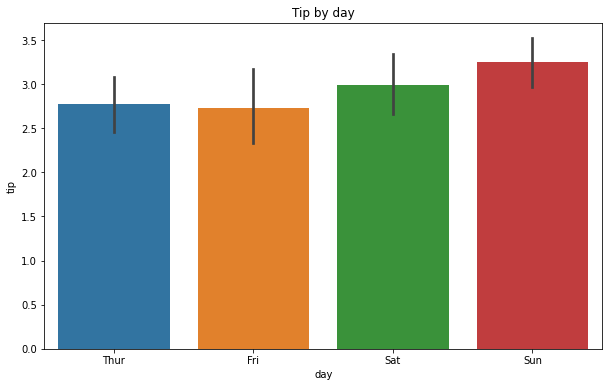

In [14]:
plt.figure( figsize =(10, 6))
sns.barplot(data = df , x= 'day', y='tip')
#plt.ylim(0,4)
plt.title('Tip by day')

Subplot 활용.

violin plot 활용.

palette 옵션 등으로 색 지정.


<AxesSubplot:xlabel='day', ylabel='tip'>

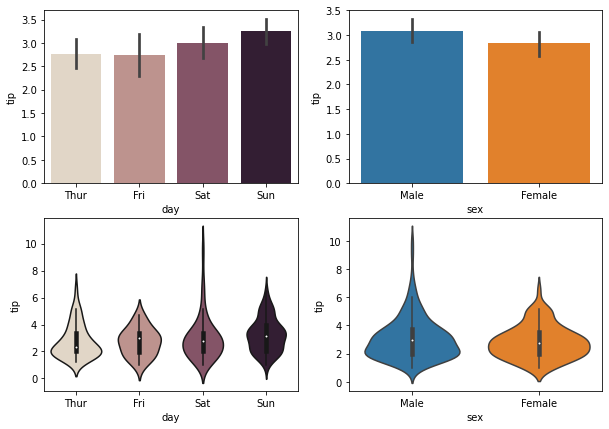

In [15]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

#------  ---------------------------------------
ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

* Color names: 기본적으로 제공되는 색상 이름 (예: 'blue', 'red', 'green' 등).
* Hex color codes: HTML 색상 코드와 같은 형식의 색상 코드 (예: '#FF5733').
* Built-in palettes: Seaborn에서 제공하는 기본 팔레트:
* deep: 기본 색상 팔레트
* muted: 더 부드러운 색상
* pastel: 파스텔 색상
* dark: 어두운 색상
* colorblind: 색약자를 위한 팔레트
* Custom palettes: sns.color_palette()를 사용해 사용자 정의 팔레트를 생성할 수 있음.
* Colormaps: Matplotlib에서 제공하는 colormap(예: 'Blues', 'Reds', 'viridis' 등).
* palette="ch:.25"와 같은 형식은 cubehelix 팔레트를 사용할 때의 구문으로, ch는 hue의 변화를 나타내며 0.25는 채도 설정.

In [16]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

기본 색상 팔레트:
* deep - “d”
* muted - “m”
* pastel - “p”
* bright - “b”
* dark - “d”
* colorblind - “c”

사전 정의된 다른 팔레트:
* coolwarm
* Set1, Set2, Set3 (Matplotlib의 팔레트)
* Spectral
* RdYlBu
* Blues
* Greens
* Oranges
* Purples
* Reds
* YlGnBu
* YlOrRd
* viridis
* plasma
* inferno
* magma
* cividis


그라디언트 컬러 팔레트:
* cubehelix - "ch"
* crest
* rocket
* flare

In [17]:
print(sns.color_palette("pastel6").as_hex())

['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']


catplot  ( 범주형 데이터와 수치형 데이터 간의 관계와 패턴 파악에 유용 )

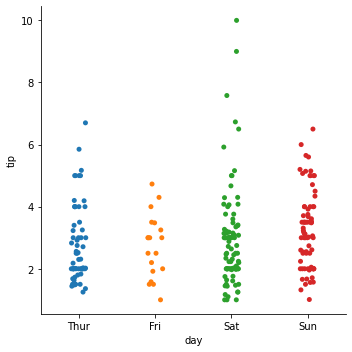

In [18]:
sns.catplot(x="day", y="tip", jitter=True, data=tips)

jitter=True: 데이터 포인트를 약간 무작위로 이동시켜, 동일한 위치에 위치한 점들이 겹치는 것을 방지. 이 경우, 각 점이 서로 눈에 띄게 분리되어 보여 시각적으로 더 명확하게 데이터의 분포를 확인할 수 있음. 데이터 포인트가 동일한 값일 때 유용.

jitter=False: 데이터 포인트가 원래 위치에 그대로 표시 됨. 이 경우, 많은 데이터 포인트가 동일한 값에 모여 있으면 겹쳐서 보일 수 있으며, 패턴을 인식하기 어려울 수 있음.

Text(0.5, 1.0, 'Tip by time')

<Figure size 720x432 with 0 Axes>

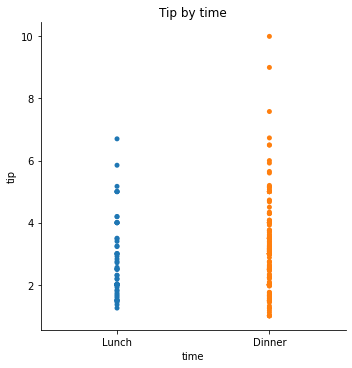

In [19]:
# Q. 시간대(time)에 따른 tips의 그래프를 catplot으로 표현해보세요!
plt.figure(figsize=(10,6))
sns.catplot(data=df, x='time', y='tip' , jitter=False)
plt.title('Tip by time')

# 1-9. 그래프 4대 천왕 (3) 수치형 데이터

# 수치형 데이터


2) 산점도(scatter plot)

hue 인자는 데이터 시각화에서 색상을 통해 추가적인 데이터를 구분할 수 있도록 함.

특히 산점도와 같은 플롯에서 hue 인자를 사용하면 데이터의 특정 카테고리, 곧 범주형 변수를 색상으로 표시할 수 있음.




* tip과 total_bill의 관계를 시각화

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

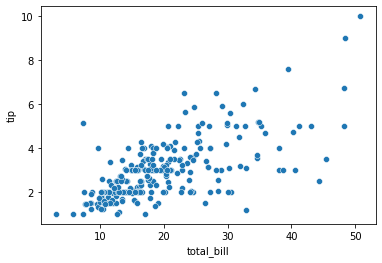

In [20]:
sns.scatterplot(data = df , x='total_bill', y='tip')  ## , palette="ch:r=-.2,d=.3_r"

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

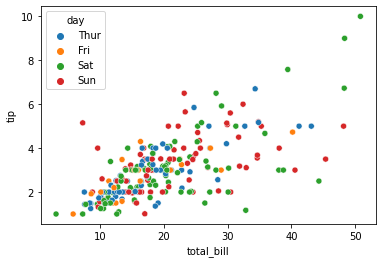

In [21]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day") #### 일별로 색 다르게 표기

3) 선 그래프(line graph)

{numpy 선그래프 예제 생성 }

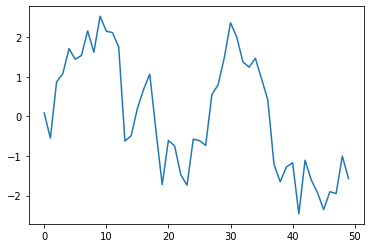

In [22]:
# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다.
# cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())
plt.show()

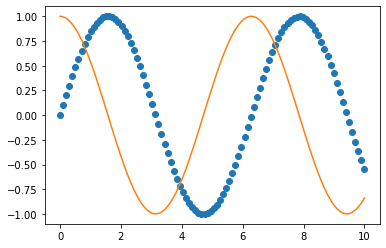

In [23]:
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

seaborn활용

<AxesSubplot:>

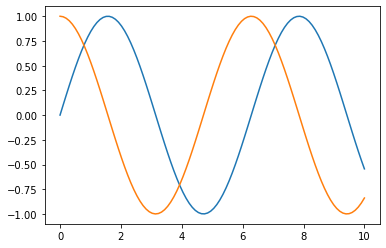

In [24]:
sns.lineplot(x = x, y=np.sin(x))
sns.lineplot(x = x, y=np.cos(x))

4) 히스토그램
* 도수분포표 그래프.

> ↔ 가로축

>     계급: 변수의 구간, bin (or bucket)

> ↕ 세로축

>     도수: 빈도수, frequency

> 전체 총량: n

히스토그램 만들기

* x1은 평균은 100이고 표준편차는 15인 정규분포를 따름
* x2는 평균은 130이고 표준편차는 15인 정규분포를 따름
* 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기

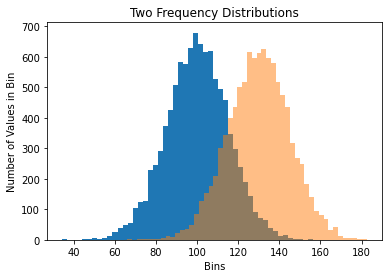

In [25]:
#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻.  hist 히스토그램 의미인 함수명
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5) # alpha : 0~1 사이값의 투명도 표현.

ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 . xaxis 라는 객체 변수.
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시 . yaxis라는 객체 변수.

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

patches = ax1.hist(x1, bins=50, <span style="background-color:#fff5b1">density=False</span>)

density=False는 히스토그램을 그릴 때의 옵션으로, 히스토그램의 Y축이 나타내는 값의 의미를 결정.

* density=False - 히스토그램은 각 구간(bin)에서의 데이터 개수를 보여 줌. Y축 값은 각 구간에 속한 데이터 포인트의 수.
데이터의 실제 수치를 기반으로 하여, 두 분포의 상대적인 높낮이와 차이를 비교


* density=True - 확률 밀도를 보여 줌. 즉, Y축의 값이 각 구간의 상대적 빈도를 나타내며, 전체 면적이 1이 되도록 정규화 됨. 데이터가 분포되는 상대적 비율을 한눈에 볼수 있음.

예제 데이터 히스토그램 ( seaborn )

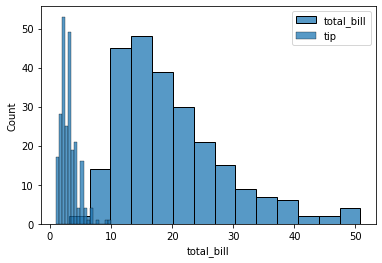

In [26]:
sns.histplot(df['total_bill'], label='total_bill')
sns.histplot(df['tip'], label='tip').legend()  # 범례도추가 . label 인자를 사용하여 각 데이터 시리즈의 이름을 지정.

전체 결제 금액 대비 팁의 비율을 나타내는 히스토그램 작성 ( pyplot 활용 )

In [27]:
df['tip_pct'] = df['tip']/df['total_bill'] * 100

In [28]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


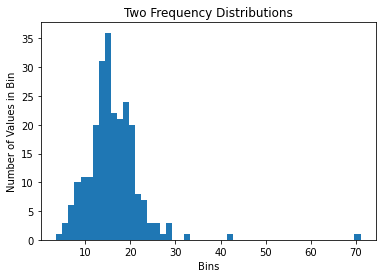

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1,1)

patches = ax1.hist(df['tip_pct'], bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻.  hist 히스토그램 의미인 함수명

ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 . xaxis 라는 객체 변수.
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시 . yaxis라는 객체 변수.

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

전체 결제 금액 대비 팁의 비율을 나타내는 히스토그램 작성 ( seaborn 활용 )

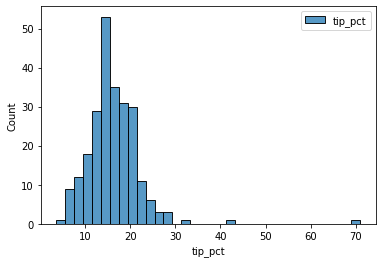

In [30]:
sns.histplot(df['tip_pct'], label='tip_pct').legend() # 범례도추가 . label 인자를 사용하여 각 데이터 시리즈의 이름을 지정.

pandas 제공 시각화

KDE(Kernel Density Estimate) 커널 밀도 추정 그래프

[KDE에 대한 설명 참고](https://darkpgmr.tistory.com/147#:~:text=Kernel%20Density%20Estimation%20(%EC%BB%A4%EB%84%90%20%EB%B0%80%EB%8F%84%20%EC%B6%94%EC%A0%95)%20%EB%B0%A9%EB%B2%95%EC%9D%80%20non%2D,%EC%9D%84%20%EA%B0%9C%EC%84%A0%ED%95%9C%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)

<AxesSubplot:ylabel='Density'>

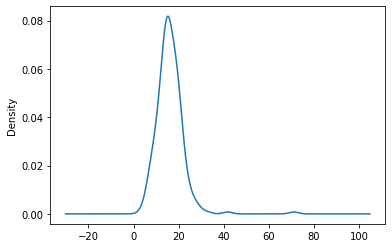

In [32]:
df['tip_pct'].plot(kind='kde')

kind 매개변수 종류 


1. **`'line'`**: 
   - 기본값이며, 선 그래프를 그림.
   - 시간 경과에 따른 데이터 변화를 시각화할 때 주로 사용.

2. **`'bar'`**: 
   - 세로 막대 그래프를 그림.
   - 카테고리 별 데이터를 비교할 때 유용.

3. **`'barh'`**: 
   - 가로 막대 그래프를 그림.
   - 세로 막대 그래프와 기능은 같지만, 방향이 가로로 그려짐.

4. **`'hist'`**: 
   - 히스토그램을 그림.
   - 데이터의 분포를 나타내는 데 유용.

5. **`'box'`**: 
   - 박스 플롯을 그림.
   - 데이터의 사분위 수, 중앙값, 이상치를 시각적으로 표현.

6. **`'kde'`**: 
   - 커널 밀도 추정 그래프를 그림.
   - 데이터의 분포를 부드러운 곡선으로 나타냄.

7. **`'density'`**: 
   - `kde`와 동일하게 커널 밀도 추정 그래프를 그림.

8. **`'area'`**: 
   - 면적 그래프를 그림.
   - 선 그래프와 유사하지만, 아래 부분이 채워져 강조됨.

9. **`'pie'`**: 
   - 파이 차트를 그림.
   - 각 카테고리의 비율을 시각화하는 데 사용.

10. **`'scatter'`**: 
    - 산점도를 그림.
    - 두 변수 간의 관계를 시각화함. 이 경우 `x`와 `y` 인수를 함께 사용해야 함.

11. **`'hexbin'`**: 
    - 헥스빈 차트를 그림.
    - 이산화된 2차원 빈을 통해 점의 밀도를 시각화함.

# 시각화 기법별 데이터 유형
* Line Plot - 시계열 데이터
* Scatter Plot - 연속형 데이터 상관관계
* Bar Plot - 범주형 데이터
* Histogram - 분포
* Box Plot - 4분위수
* Violin Plot - 분포 밀도
* Heatmap - 상관관계 행렬